## US visa 
**Life cycle of machine learning Project**
- Understanding the Problem statement
- Data collection 
- Exploratory data analysis 
- Data Cleaning 
- Data pre-processing 
- Model Training
- Choose best model

## About
The immigration and Natonality ACT(INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US worker adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the office of Foreign Labor Certification(OFLC)

## 1) Problem Statement
- OFLC gives job certification application for employers seeking to bring foreing wokers into the United States and grants certification. 
- As in last year the count of employees were huge so OFLC needs Machine Learning models to shorlist visa applicants based on their previous data. 

**The is a classification problem so we're going to build a Classification model:**
- This model is to check if visa get approved or not based on the given dataset. 
- This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain ceriteria which influences the decision.

## 2.) Data Collection. 
- The Dataset is part of Office of Foreign Labor Certification(OFLC)
- THe data consists of 25480 Rows and 12 column 
- I get this data from kaggle. 

#### 2.1) Import Data and Required Packages

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

**Import the CSV Data**

In [3]:
df = pd.read_csv('EasyVisa.csv')

Show Top 5 Records

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Shape of the dataset

In [5]:
df.shape

(25480, 12)

Summary of the dataset.

In [6]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


Check Datatypes in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Check for null values

In [8]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

## Exploring Data

In [13]:
# Define numerical and categorical columns
numerical_cols1 = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [feature for feature in df.columns if df[feature].dtypes != 'O']

categorical_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']



In [14]:
print(numerical_cols1)
print(numerical_cols)
print(categorical_cols)


['no_of_employees', 'yr_of_estab', 'prevailing_wage']
['no_of_employees', 'yr_of_estab', 'prevailing_wage']
['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [15]:
for i in categorical_cols:
    print(df[i].value_counts(normalize=True)*100)
    print('-'*40)

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
----------------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
----------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
----------------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
----------------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
-----------

**Insights**
- `Case_id` Have unique values for each column which can be dropped as it has no importance. 
- `conteinent` column is highly biased towards asia. hence we can combine other categories to form a single category. 
- `unit_of_wage` seems to be an important column as most of them are yearly contracts. 


## Univariate Analysis
- The term univariate analysis refers to the analysis f one variable prefix "uni" means one. The purpose of univariate analysis is to understand the distribution of values for a single variable. 

Other Type of Analysis are 
- **Bivariate Analysis:** The analysis of two variables. 
- **Multivariate Analysis:** The analysis of two or more variables. 

#### Numerical Features

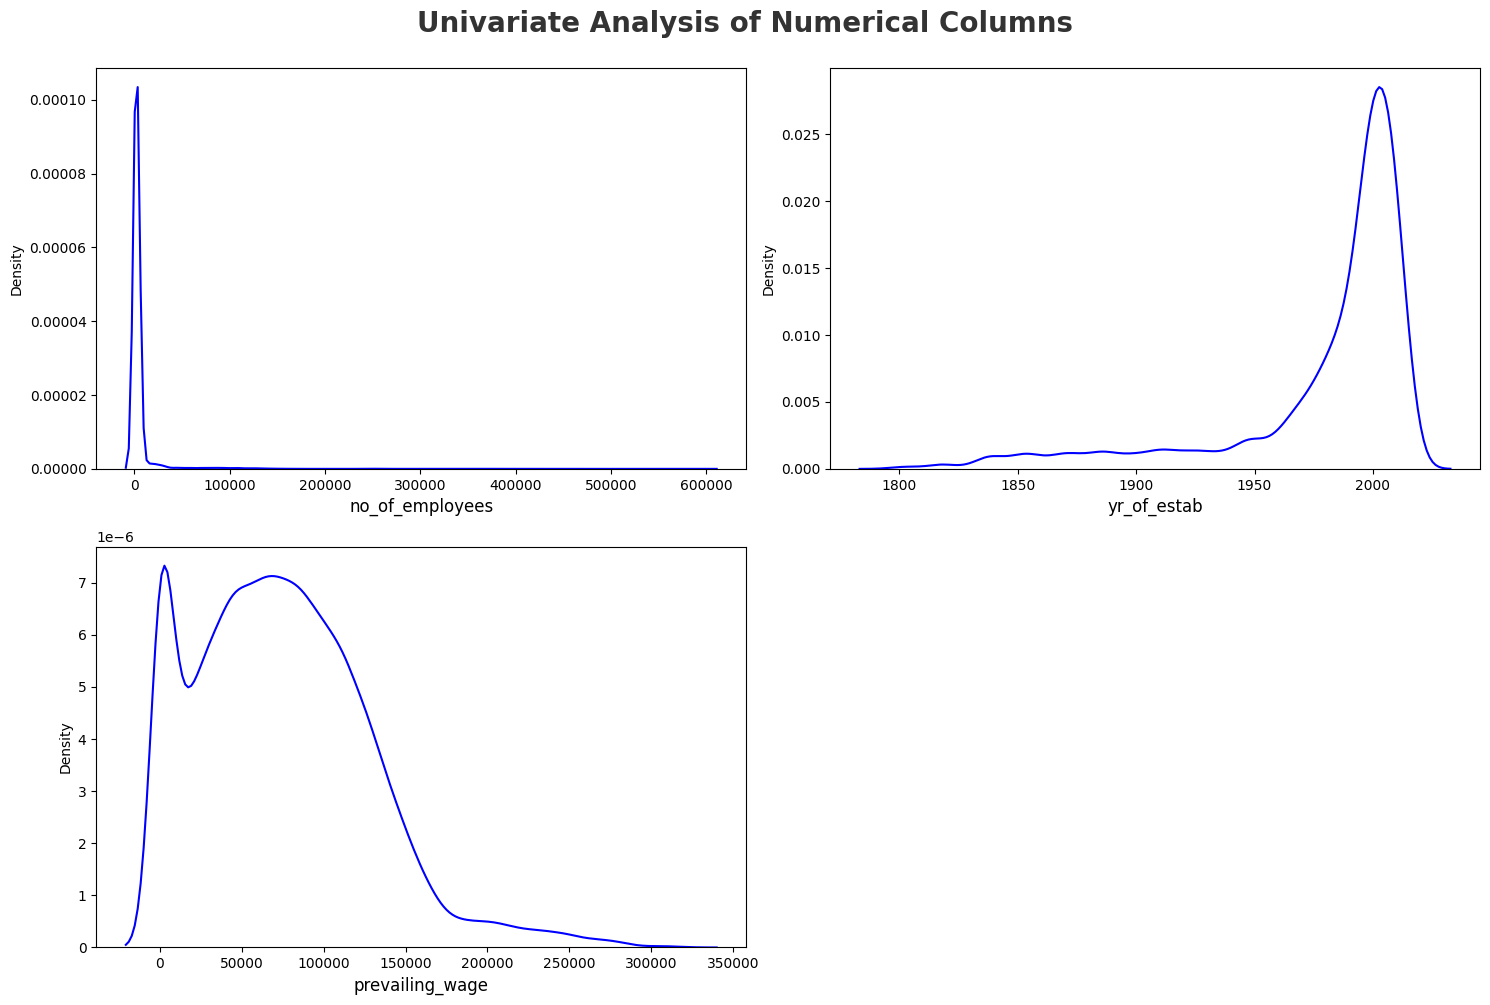

In [16]:
plt.figure(figsize=(15, 10))
plt.suptitle("Univariate Analysis of Numerical Columns", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_cols)):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(x=df[numerical_cols[i]], color='blue')
    plt.xlabel(numerical_cols[i], fontsize=12)
    plt.tight_layout()

**Insights**
- `No_of_employees` column look more skewed but it may be because of outliers. 
- `ye_of_estab` is a discrete feature. 
- `privailing-wage` is a right skewed distribution

## Categorical Features

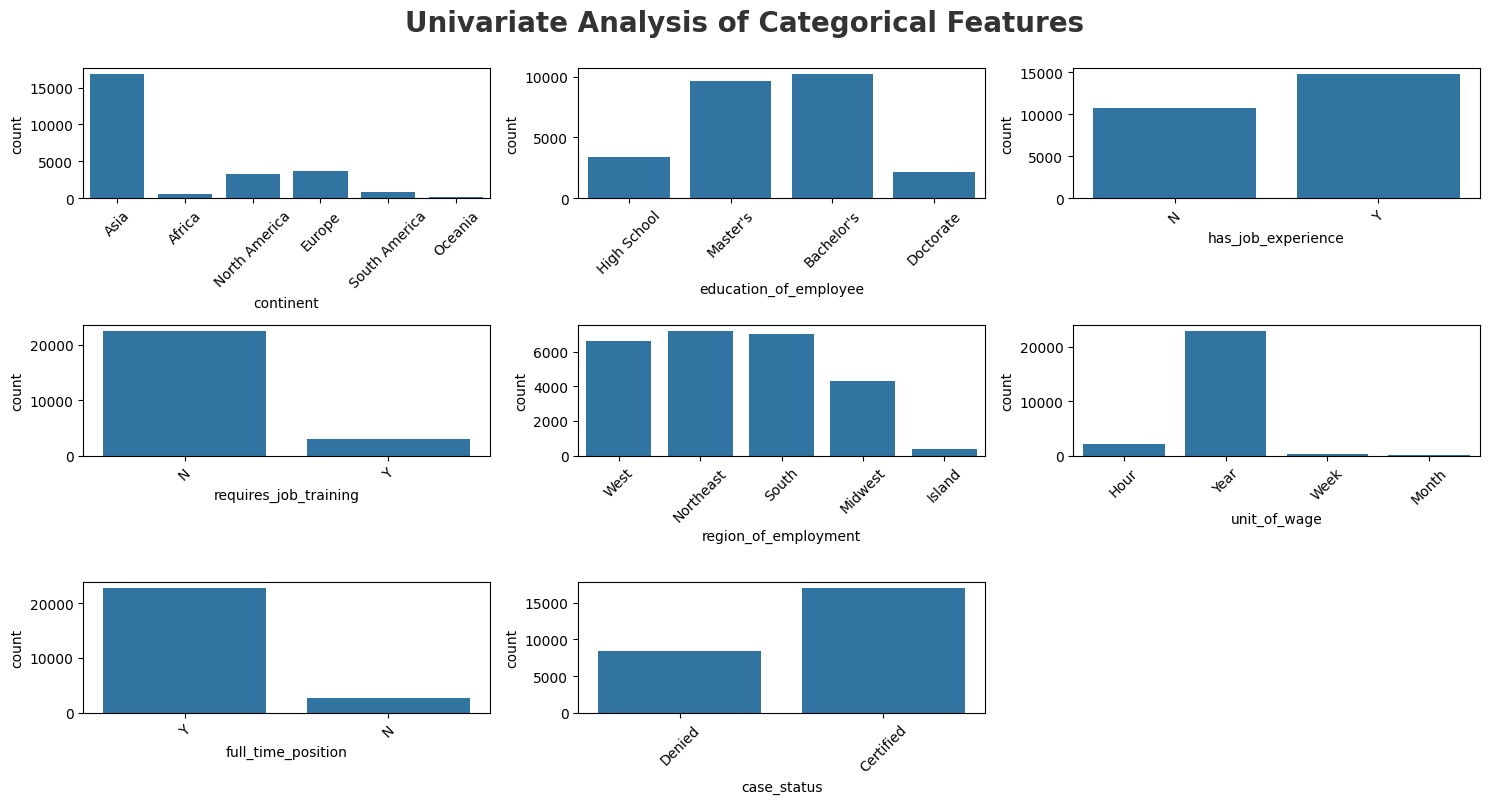

In [21]:
# categorical columns
# categorical_cols.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_cols)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_cols[i]], )
    plt.xlabel(categorical_cols[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

**Insight**
- `requires_job_training`, `unit_of_wage`, `full_time_position` and `continents` columns have single category dominating. 
- in rest of the columns are balanced. 

#### Multivariate Analysis
- Multivariate analysis is the analysis of more than one variable. 

In [22]:
discreate_features = [feature for feature in numerical_cols if len(df[feature].unique()) < 25]
continuous_features = [feature for feature in numerical_cols if feature not in discreate_features]


print('we have {} discreate features : {}'.format(len(discreate_features), discreate_features))
print('we have {} continuous features : {}'.format(len(continuous_features), continuous_features))

we have 0 discreate features : []
we have 3 continuous features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


#### Check Multicollinearity in Numerical features
- A chi-squared test (also chi-square or X^2 test) is a statistcal hypothesis test is valid to perform when the test statstic is chi-square distributed under the null hypothesis, specifically Pearson's chi-squrared test. 

- A chi-sauare statistic is one way to show a relationship between two categorical variables. 
- Here we test correlation of Categorical columns with Target column i.e case_status

Null Hypothesis (Hø): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (H1): The Feature and Target column are not independent (Correalted)

In [31]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_cols:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_cols, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


**Report**
- Here `requires_job_training` fails to Rejects Null Hypothesis which means it doesn't correlate with target column.


In [32]:
continues_features = [feature for feature in numerical_cols if len(df[feature].unique()) > 10]
print('Num of continues features :', continues_features)

Num of continues features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


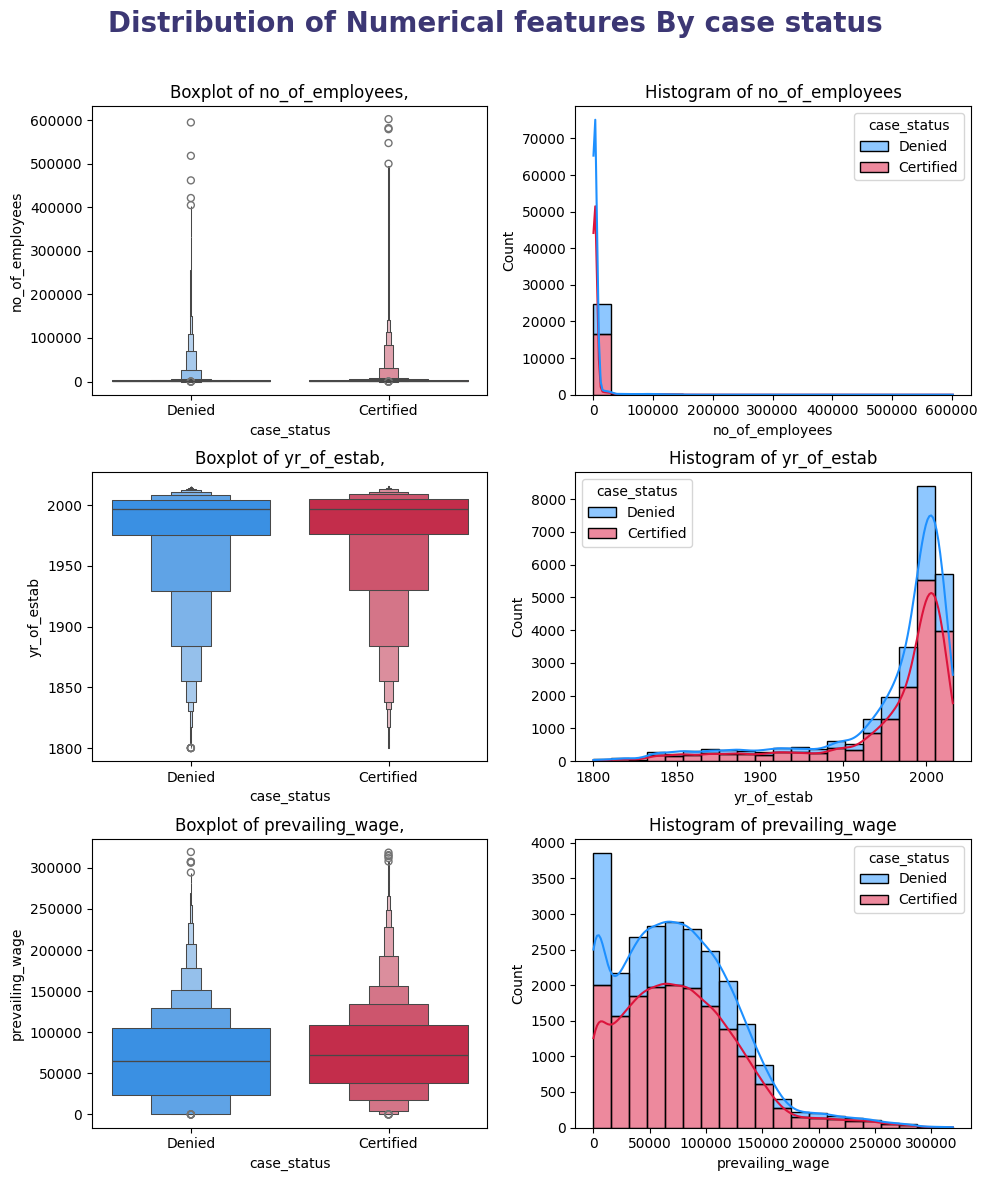

In [35]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle("Distribution of Numerical features By case status", color='#3C3774', fontsize=20, fontweight='bold',ha='center')

for i, col in enumerate(continues_features):
    sns.boxenplot(data=df, x='case_status', y=col, ax=ax[i,0], palette=clr1)
    ax[i,0].set_title(f'Boxplot of {col},', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, ax=ax[i,1], palette=clr1, multiple='stack')
    ax[i,1].set_title(f'Histogram of {col}', fontsize=12)
    
fig.tight_layout()
fig.subplots_adjust(top=0.90)


#### Inital Analysis Report

- No of Employees has many outliers which can be Handled in Feature Engineerign and `No_of_employees` is Right Skewed. 
- `Yr_of_estab` is left skewed and some outliers below the lower bound of Box plot. 
- `prevailing_wage` is right skwewd with outliers above upper bound of Box plot. 
- There is no missing values in the dataset 
- The `case_id` column can be deleted because each row has unique values. 
- The `case_status` column is the target to predict 
- In the Categorical column features can be made Binary numerical in deature Encoding.

### Visualization
#### 4.1 Visualize the Target columns

([<matplotlib.patches.Wedge at 0x15a27f5e0>,
 [Text(-1.0369046481517772, -0.6040105550743625, 'Certified'),
  Text(0.950495823794605, 0.5536765201351918, 'Denied')],
 [Text(-0.6048610447552032, -0.3523394904600448, '66.8%'),
  Text(0.5184522675243299, 0.30200537461919547, '33.2%')])

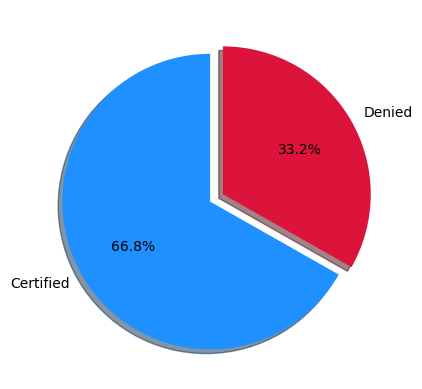

In [37]:
percentage = df['case_status'].value_counts(normalize=True) * 100
plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.1, 0), colors=['#1E90FF', '#DC143C'])

- From the chart it is clear that the Target Variable is Imblanced. 

#### Does aplicant Continent has any impact on Visa status?


In [39]:
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()

proportion
continent     case_status            
Africa        Certified      0.720508
              Denied         0.279492
Asia          Certified      0.653105
              Denied         0.346895
Europe        Certified      0.792337
              Denied         0.207663
North America Certified      0.618773
              Denied         0.381227
Oceania       Certified      0.635417
              Denied         0.364583
South America Certified      0.578638
              Denied         0.421362

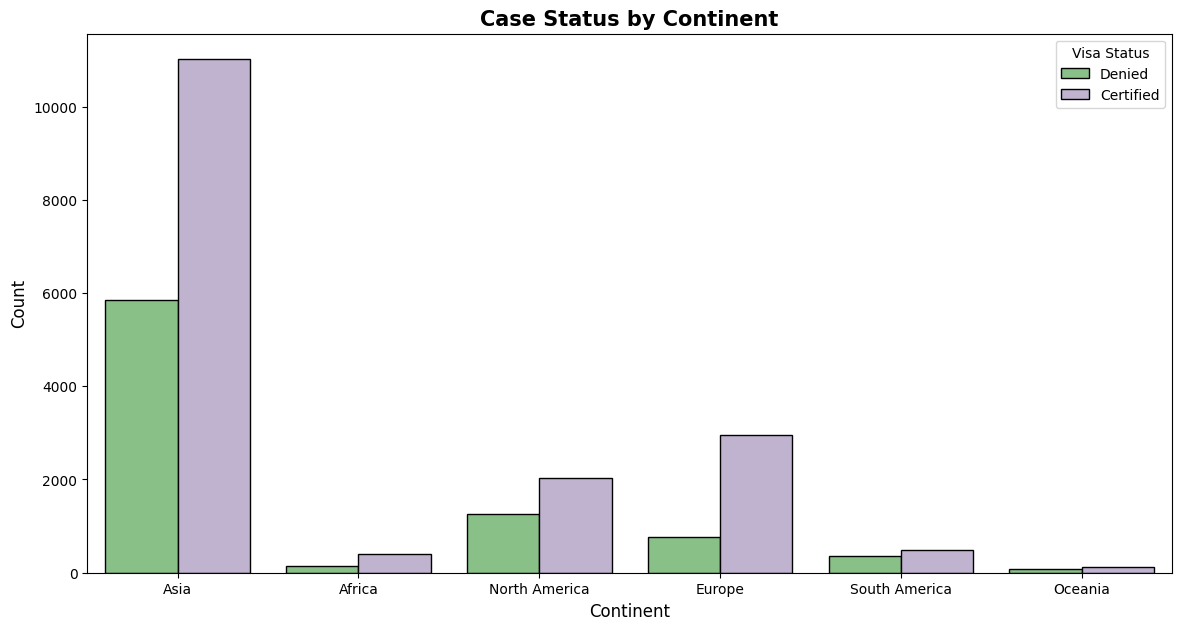

In [40]:
plt.subplots(figsize=(14, 7))
sns.countplot(x='continent', hue='case_status', data=df, palette='Accent', ec='black')
plt.title('Case Status by Continent', fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Continent', fontsize=12)
plt.legend(title='Visa Status', fancybox=True)
plt.show()

In [41]:
df2 = df.copy()

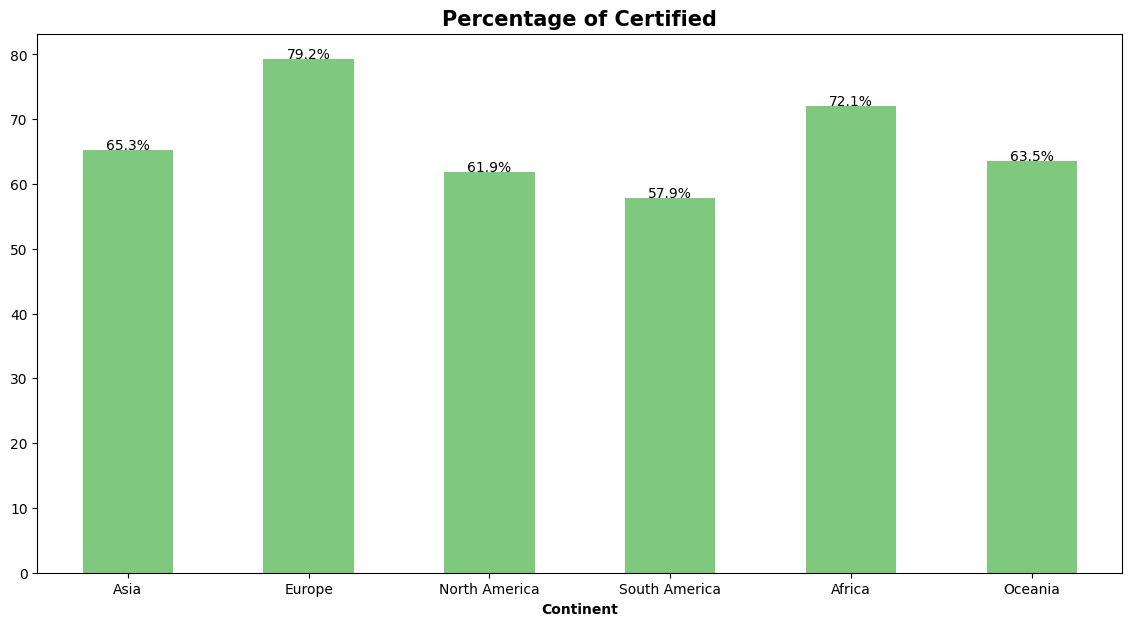

In [43]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Insights**
- As per the Chart Asia apllicants applied more than other continents. 
- 43% of Certified application are from Aisa
- This is followed by Europe with 11% of Certified applicants. 
- Higest chance to getting certified if you are from Europe > Africa > Asia > Oceania > North America > South America

In [45]:
# Does data by Education and their count of case_status
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

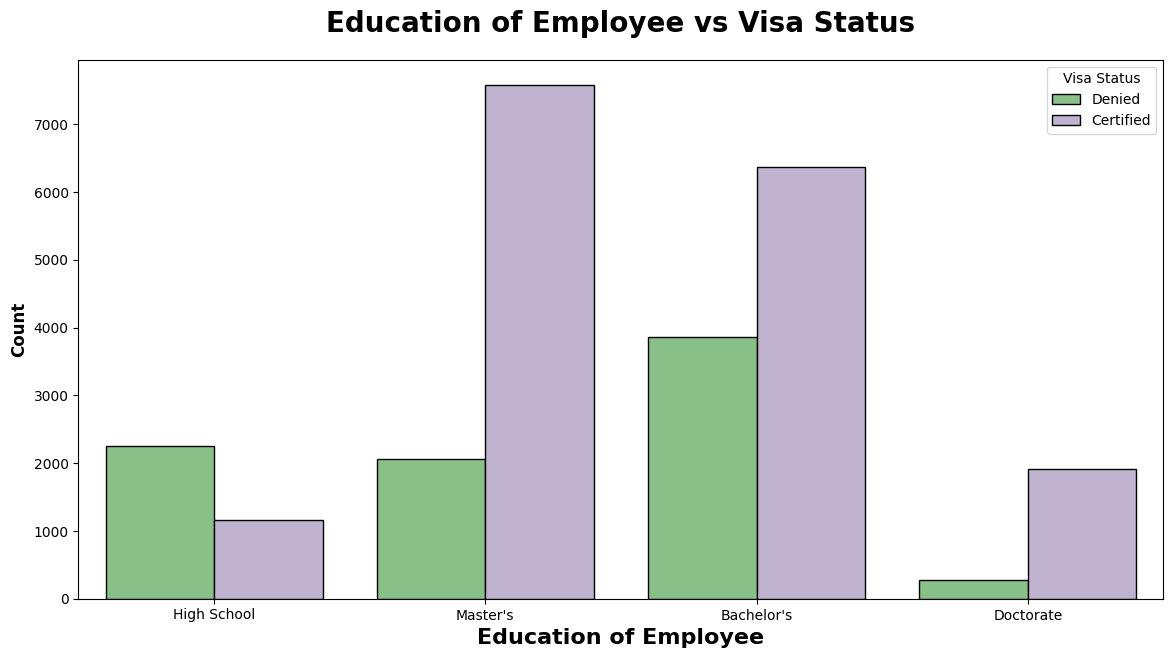

In [46]:
plt.subplots(figsize=(14,7))
sns.countplot(x="education_of_employee",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Education of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

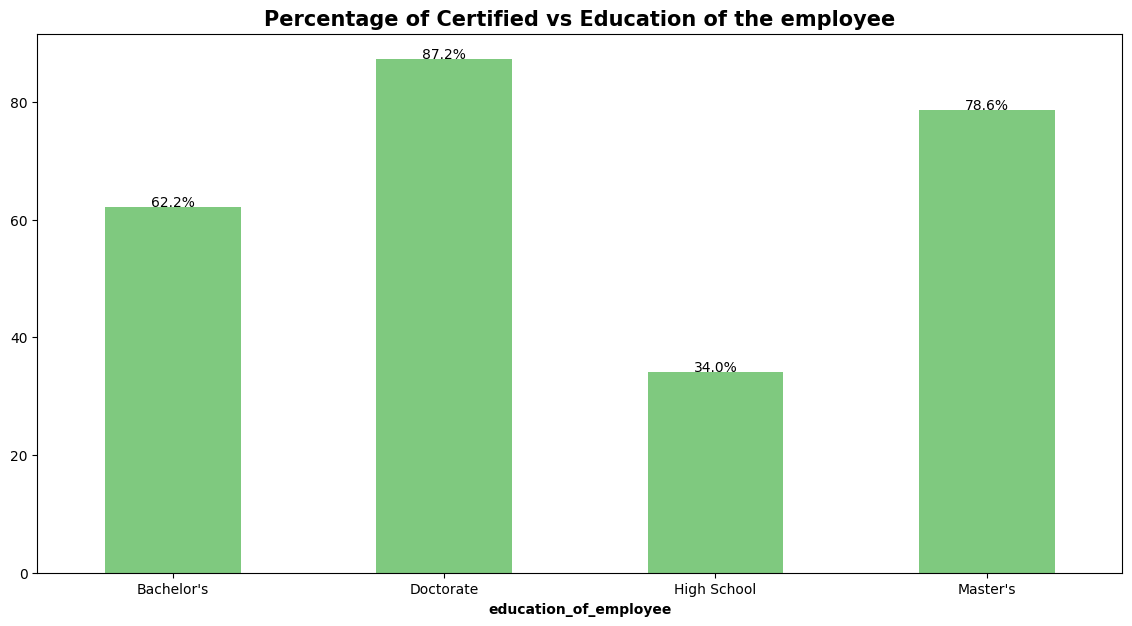

In [47]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Education of the employee" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('education_of_employee' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Insigth**
- education status has high impact 
- `Doctorate` and `Master's` graduates have higher cange of being accepted then the others. 

In [48]:
# Does applicat's preious work experience has any impact on Visa status?
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

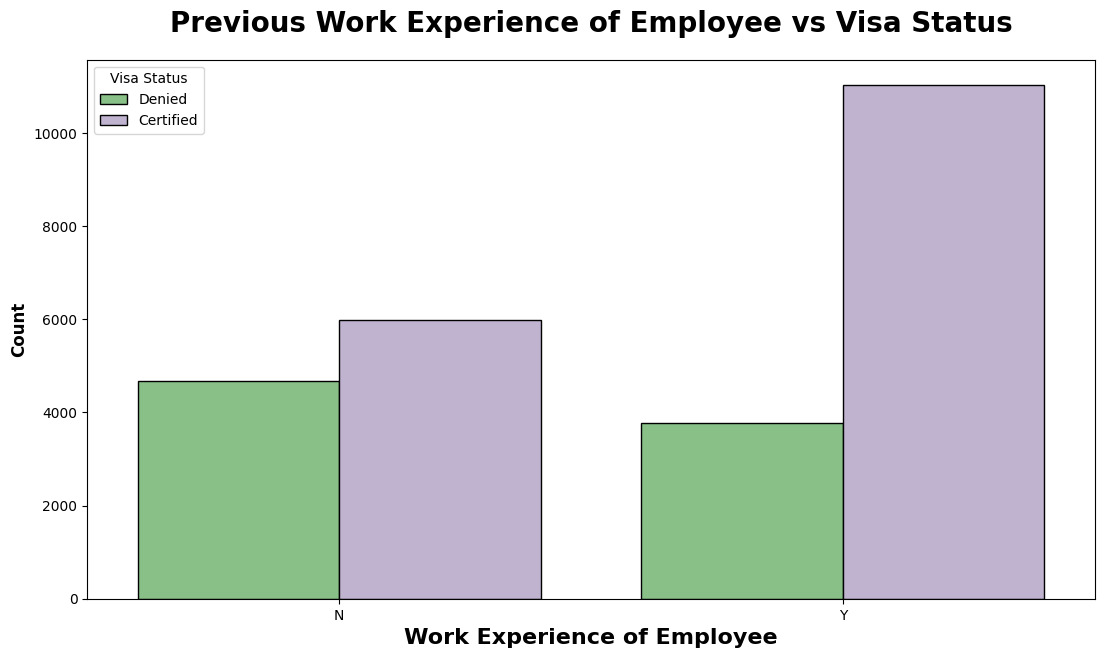

In [49]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

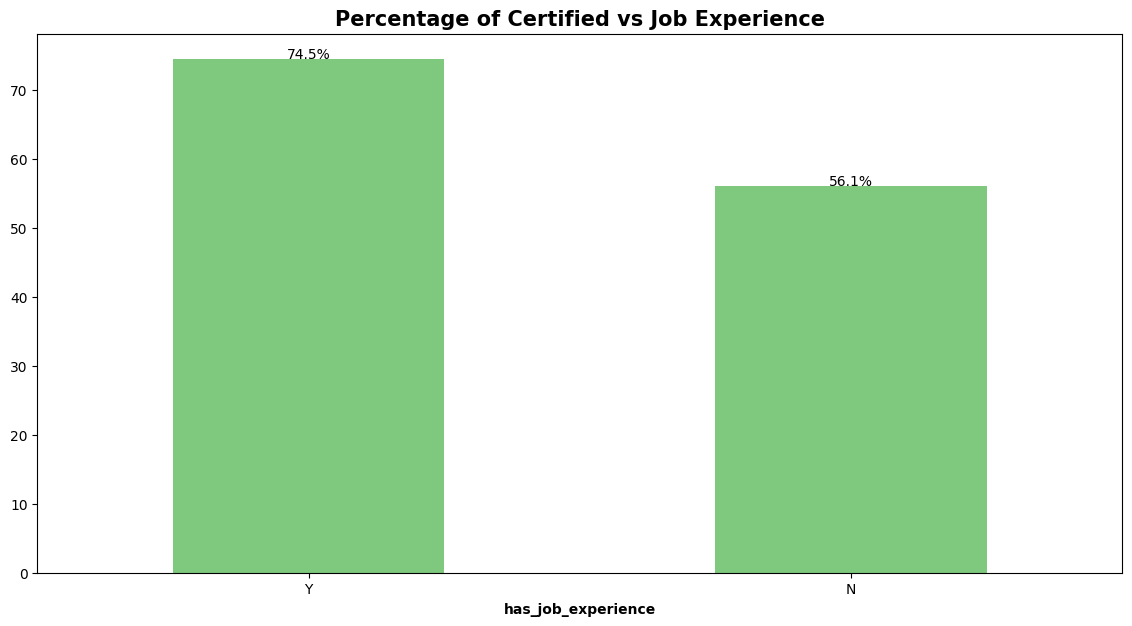

In [50]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Job Experience" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
- People with previous work experience has been certified 74.5% only 25.5% applicant has been denied. 
- People with No previous work experience has been certified 56% and denied 43%. 
- This means work experience has effect on Visa status. 
- There is a slight edge for the people wiht work experiences then the dresheres as expected. But the difference is not huge. 

In [51]:
# IF the Employee requires job training, does it make any impact on visa status?
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

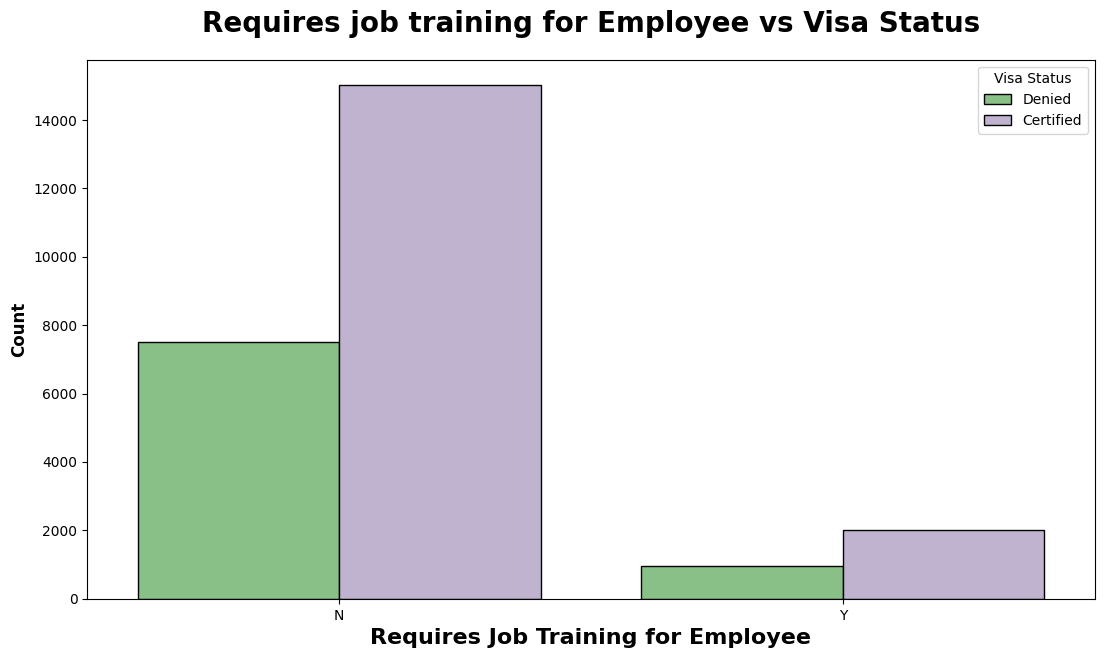

In [52]:
plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Requires job training for Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

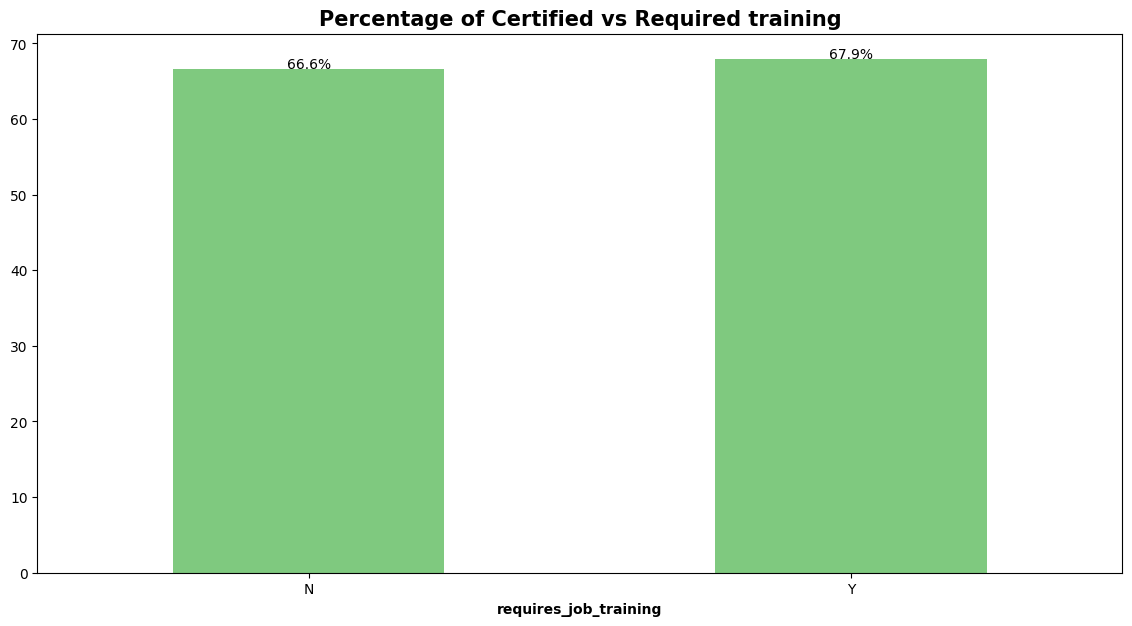

In [53]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Required training" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
- If employee requires job training and it doesn't ahve any effect on Visa status. 
- 88% of applicant don't require job
- 63% of people who doesn't want job training got certified. 
- For example who require job training 67% of people got certified. 
- As we checked in Chi-Squared test this feature doesn't have much impact on target variable, which is confirmed by above plot. 

In [56]:
# Does Number of employees of employer has any impact on Visa status?
df.groupby('no_of_employees')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
no_of_employees case_status            
-26             Certified     57.142857
                Denied        42.857143
-25             Certified     80.000000
                Denied        20.000000
-17             Certified     50.000000
...                                 ...
 547172         Certified    100.000000
 579004         Certified    100.000000
 581468         Certified    100.000000
 594472         Denied       100.000000
 602069         Certified    100.000000

[10689 rows x 1 columns]

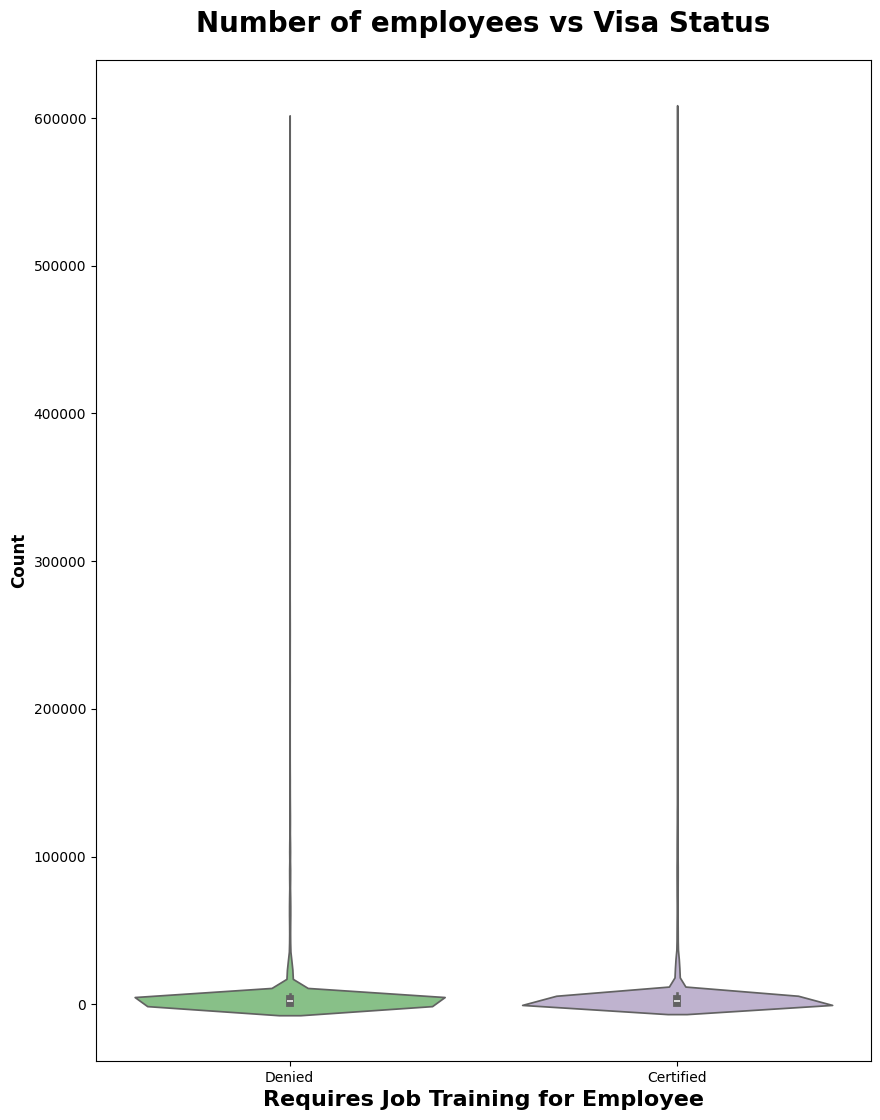

In [57]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="case_status",y='no_of_employees', data=df, palette="Accent")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

**Insigths**
- The distribution of both is similar. But there are outliers in both the classes which need to be handled. 

In [58]:
# Wages and its impact on Visa status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
unit_of_wage case_status            
Hour         Denied        65.368567
             Certified     34.631433
Month        Certified     61.797753
             Denied        38.202247
Week         Certified     62.132353
             Denied        37.867647
Year         Certified     69.885027
             Denied        30.114973

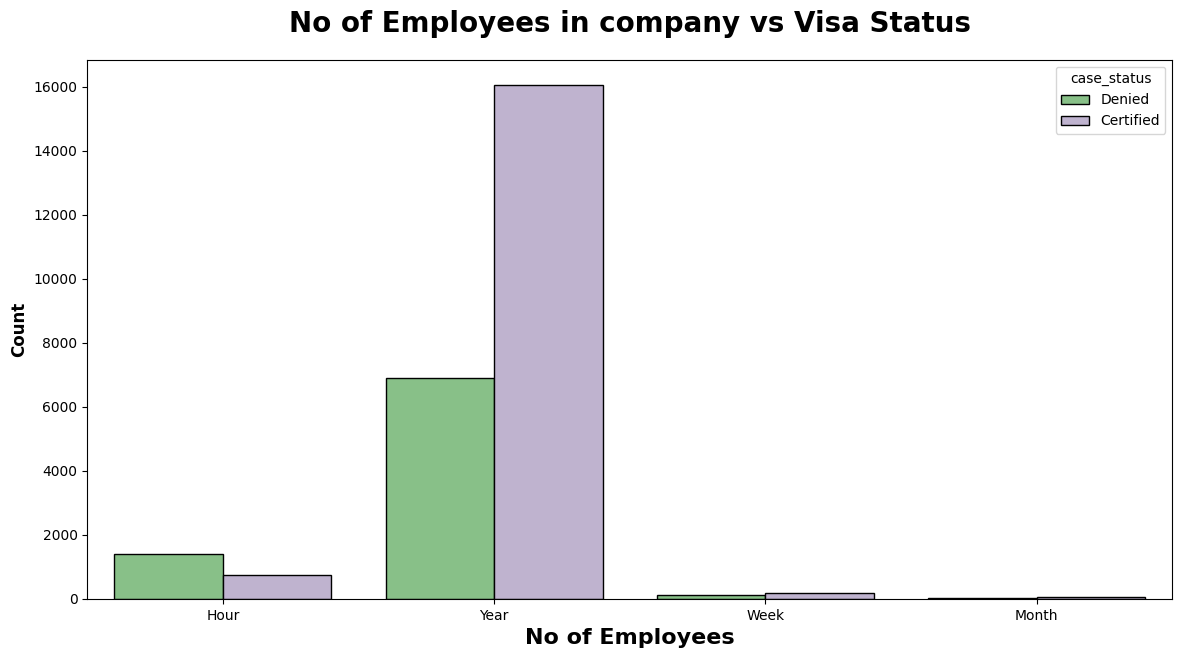

In [59]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("No of Employees in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

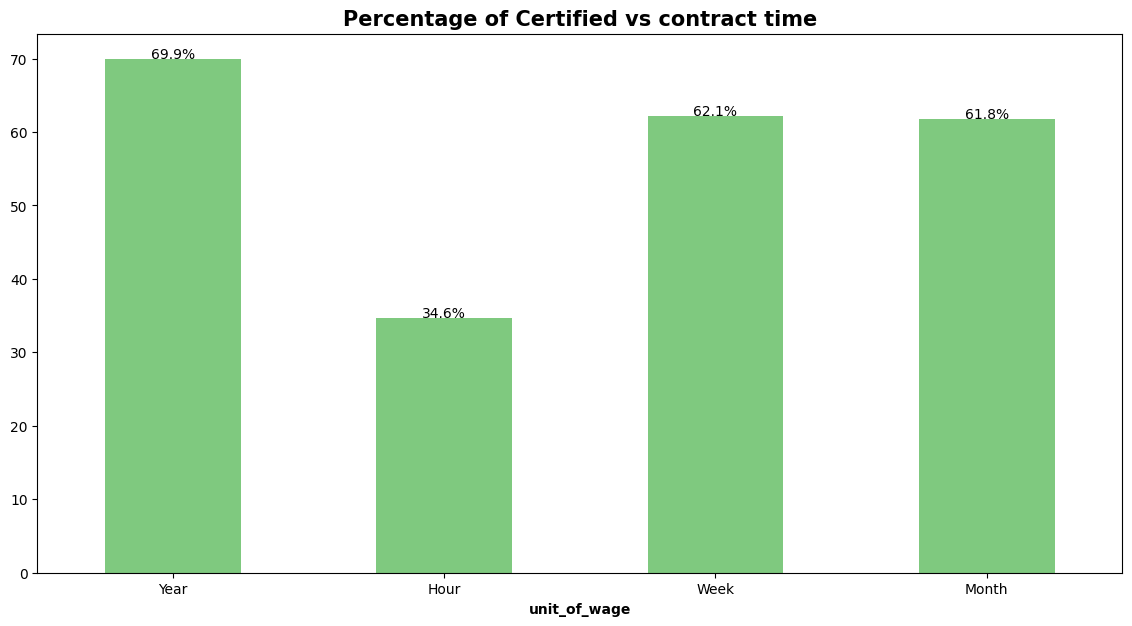

In [60]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs contract time" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
- For employees who applied for hourly pay 65% of them were denied. 
- Yearly unit wage application were accepted for 69% and denied for 31% of the time. 
- There is a higher chance of yearly contract than other and immediately followed by week and month. 

In [ ]:
# Does Region of employment has impact on Visa status?


In [61]:
df.groupby('region_of_employment')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
region_of_employment case_status            
Island               Certified     60.266667
                     Denied        39.733333
Midwest              Certified     75.528210
                     Denied        24.471790
Northeast            Certified     62.904795
                     Denied        37.095205
South                Certified     70.015676
                     Denied        29.984324
West                 Certified     62.253265
                     Denied        37.746735

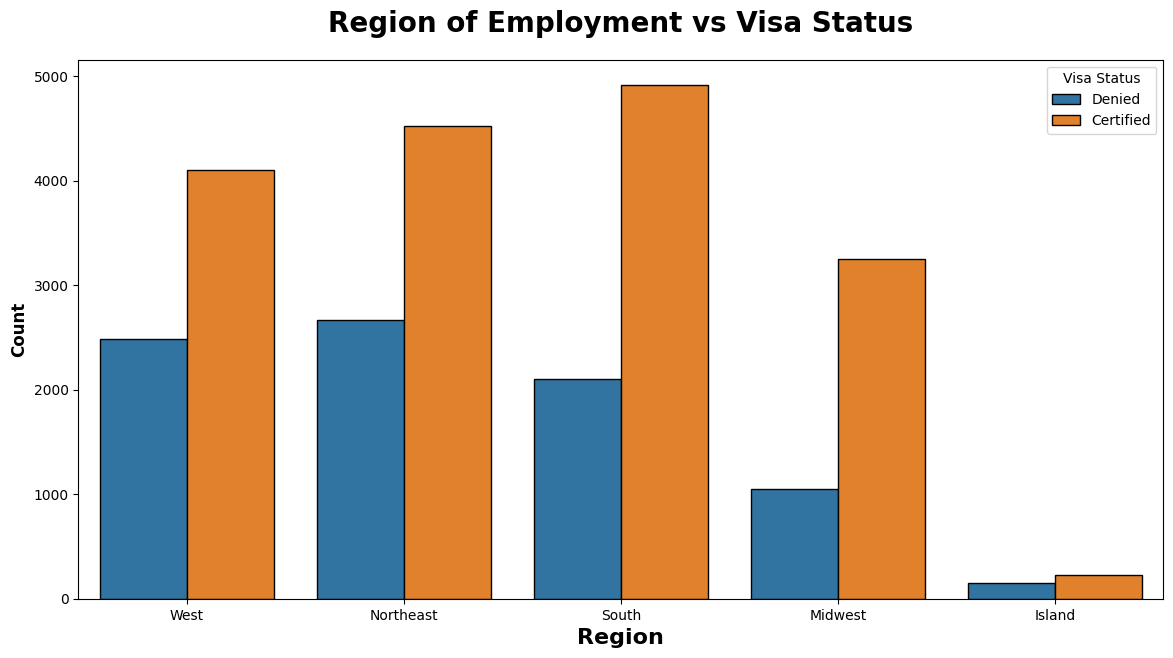

In [62]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

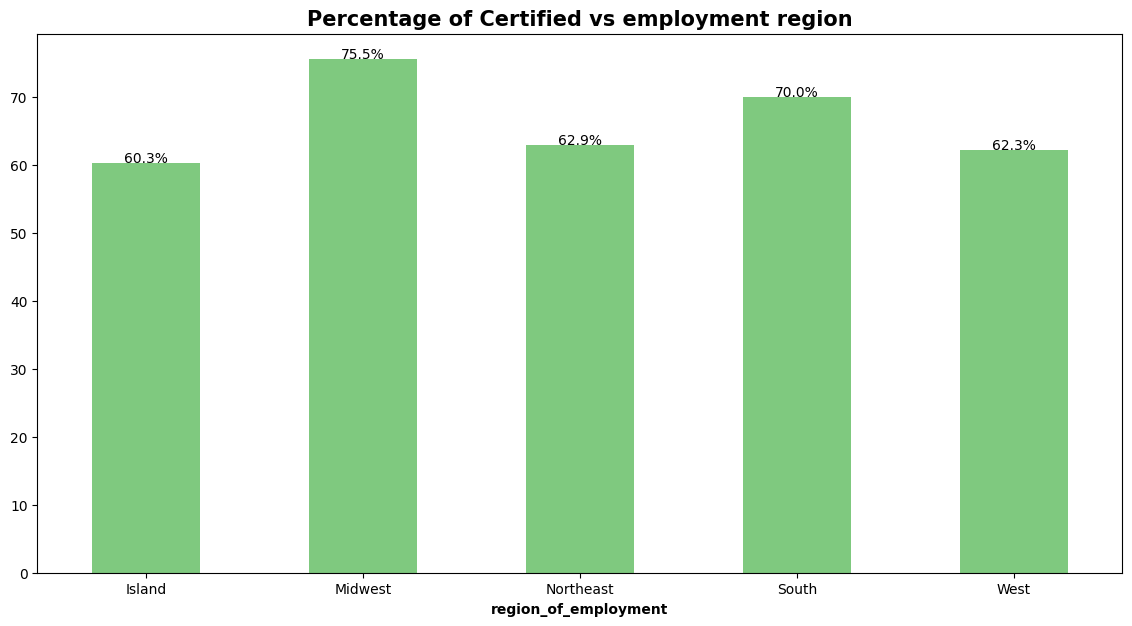

In [63]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs employment region" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
- As per chat all the region have very similar pattern of getting Visa certified and Denied. 
- There is a slight edge for `midwest` followed by `South` region

In [65]:
# Does Prevailing wage has any impact on Visa status?
df.groupby('prevailing_wage')['case_status'].value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

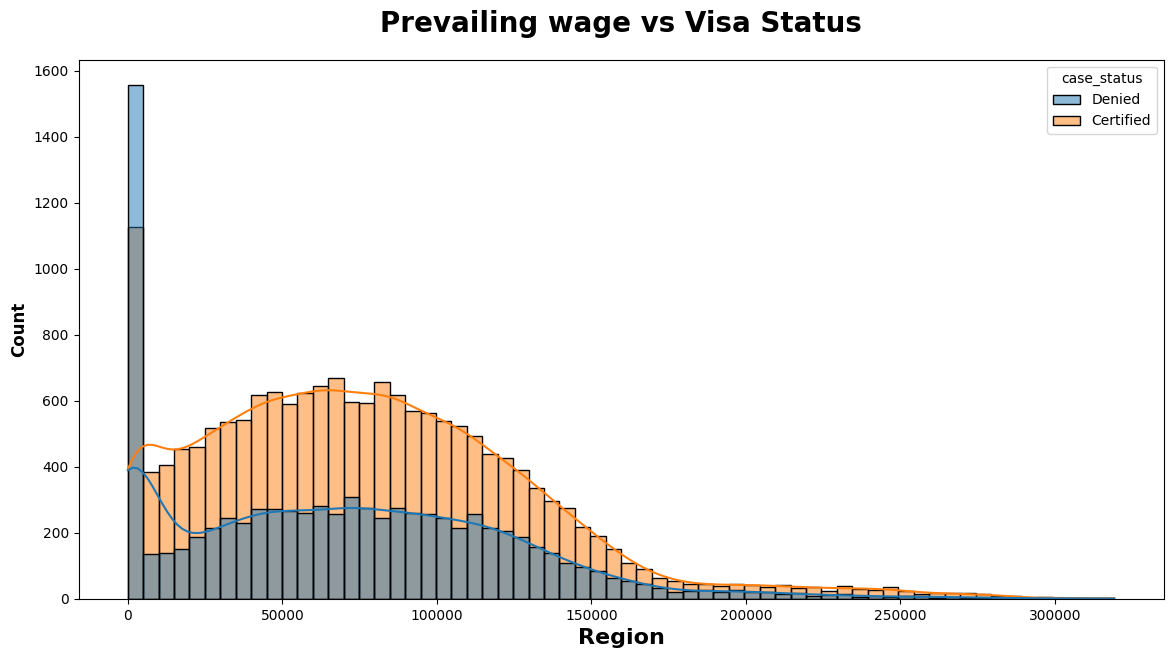

In [66]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Insights**
- The distribution of both the classes are same but need to handel the outliers. 

In [72]:
# Prevailing wage based on Education
print('Average prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage', ascending=False)

Average prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


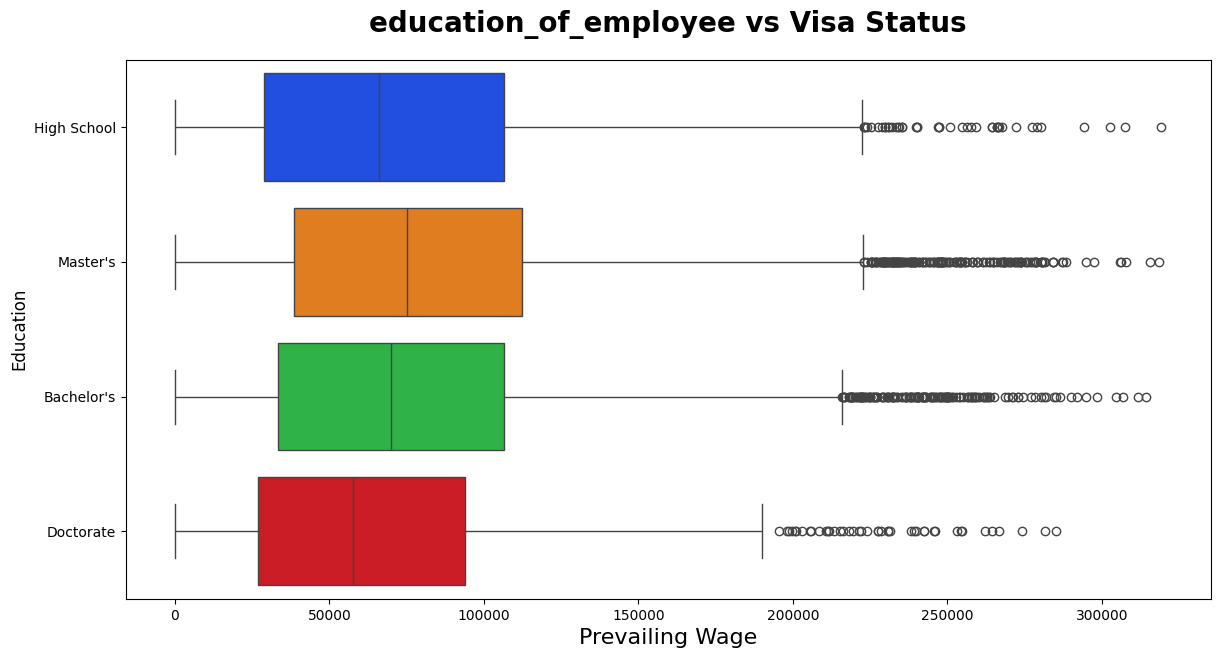

In [70]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", fontsize=16)
plt.ylabel("Education", fontsize=12)
plt.show()

**Report**
- Based on the above table and charts its seen that applicant with Mater's education has higher average prevaling wages. 
- Master's education applicants have mean salary of $78.8k, which approximetly 20% higher than Doctrate's average wage, which is strage. 

In [74]:
# Prevailing wage based on job experience
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage', ascending=False)

,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


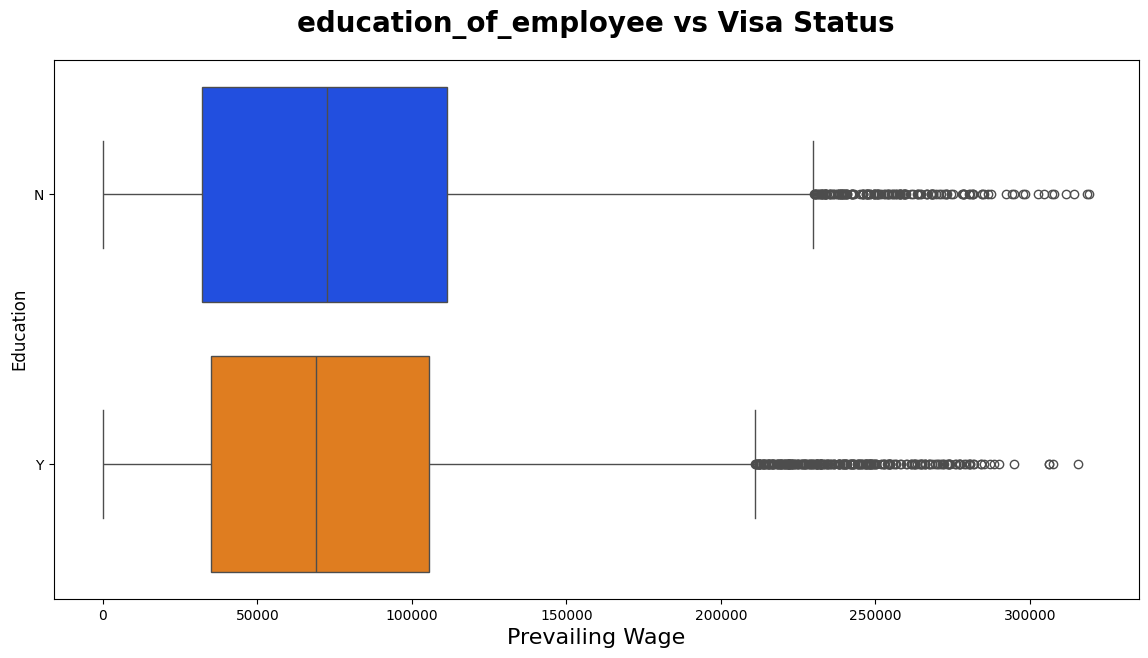

In [75]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="has_job_experience",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", fontsize=16)
plt.ylabel("Education", fontsize=12)
plt.show()

**Report**
- Suprisingly people who has less job experience has more prevailing wage. 
- No job experence applicant has median prevailing wage as 72k USD
- Previous job experience applicant has median prevailing wage as 69k USD. 

In [76]:
# Prevailing wage based on Continent
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage', ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


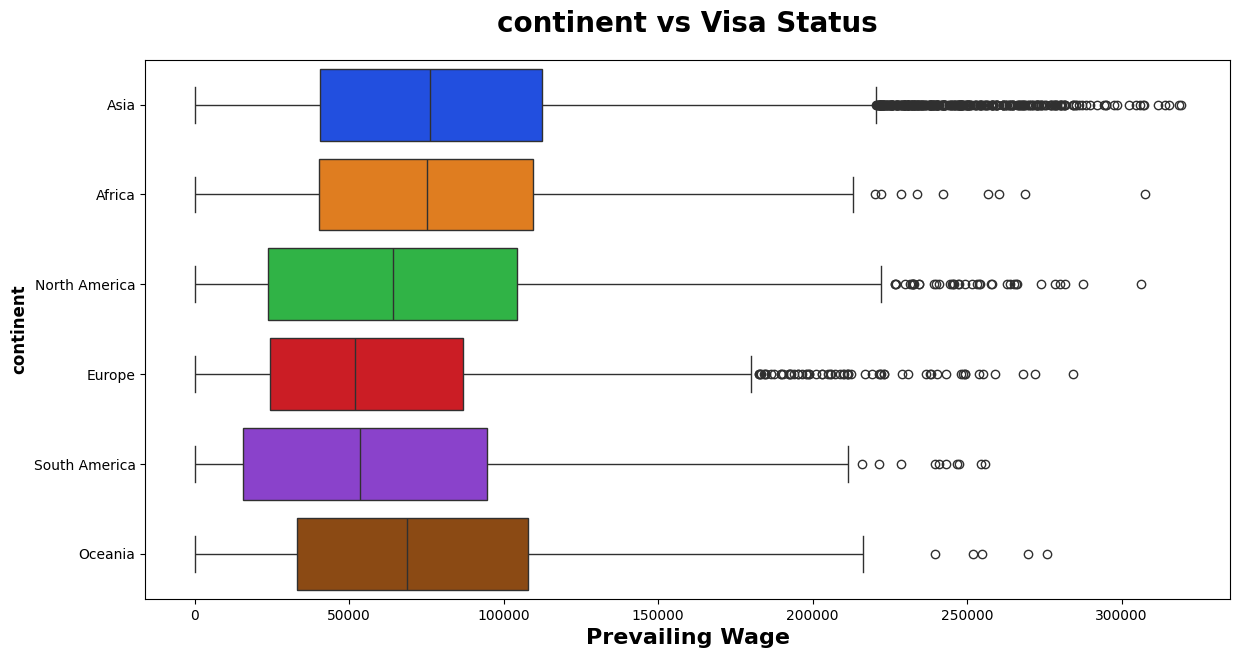

In [77]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

**Report**
- Average salary of people from Asia is higher than other continents. 

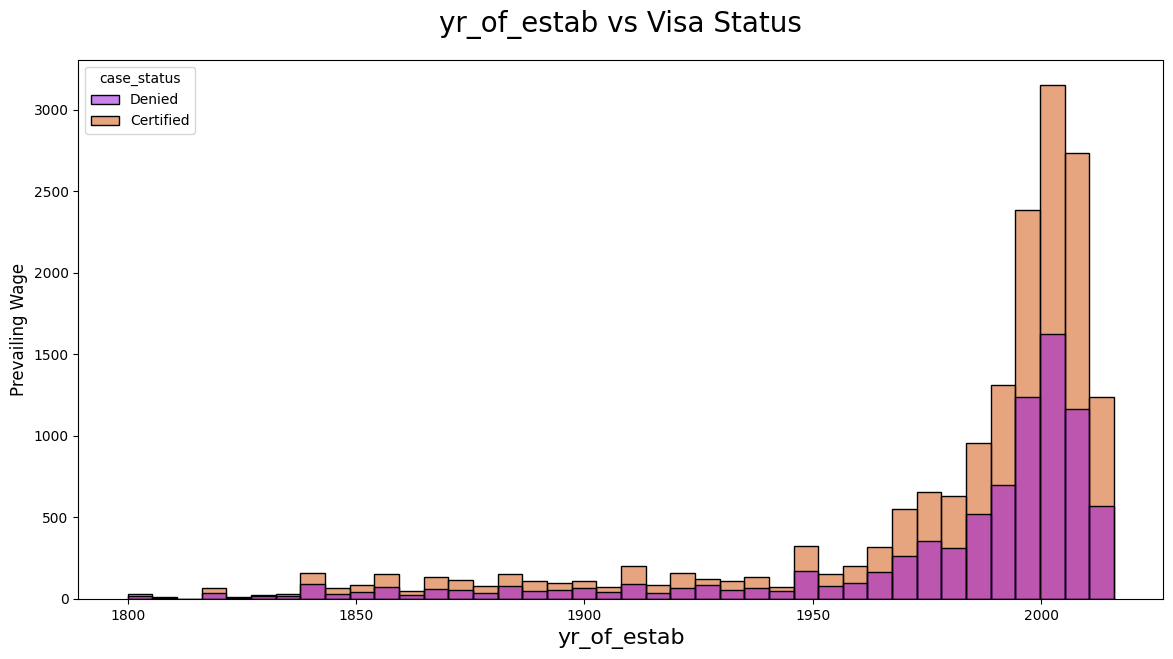

In [81]:
# Year of Establishment 
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", fontsize=20, pad=20)
plt.xlabel("yr_of_estab",  fontsize=16)
plt.ylabel("Prevailing Wage",  fontsize=12)
plt.show()

**Report**
- Each bins consists of 5 years. 
- Many companies were established after year 2000. 
- The most company establishment happened in year 2000-2005. 

## Final report 
- `case_id` column can be dropped as it is an ID. 
- `requires_job_training` column can be dropped as it doesn't have much impact on target variable, proved in visualization and chi2 test.
- `no_of_employees` , `prevailing_wage` columns have outlier which should be handled. 
- `continent` column has few unique values with very less count, which can be made as **others**
- Target column `case_status` is imbalanced can be handled before model building. 